# EDA 
### to understand the data before ML

In [1]:
import pandas as pd

In [2]:
# Show all columns (no truncation)
pd.set_option("display.max_columns", None)

# Optional: show wider tables without wrapping
pd.set_option("display.width", None)

In [3]:
df = pd.read_csv("lendingclub_clean.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Data columns (total 26 columns):
 #   Column                Dtype  
---  ------                -----  
 0   loan_amnt             float64
 1   term                  object 
 2   int_rate              float64
 3   installment           float64
 4   grade                 object 
 5   sub_grade             object 
 6   emp_title             object 
 7   emp_length            object 
 8   home_ownership        object 
 9   annual_inc            float64
 10  verification_status   object 
 11  issue_d               object 
 12  loan_status           object 
 13  purpose               object 
 14  title                 object 
 15  dti                   float64
 16  earliest_cr_line      object 
 17  open_acc              float64
 18  pub_rec               float64
 19  revol_bal             float64
 20  revol_util            float64
 21  total_acc             float64
 22  initial_list_status   object 
 23  applica

In [5]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,debt_consolidation,Debt consolidation,5.91,Aug-2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,small_business,Business,16.06,Dec-1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,home_improvement,NaN,10.78,Aug-2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
3,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,debt_consolidation,Debt consolidation,17.06,Sep-2008,13.0,0.0,7802.0,11.6,17.0,w,Individual,1.0,0.0
4,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,major_purchase,Major purchase,25.37,Jun-1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt


In [7]:
loan_df = df.copy()

In [8]:
# target- loan_status : keep only fullypaid and chargerd odd - convert to binary : 0=fully paid, 1 = charged off

# Keep only Fully Paid and Charged Off
loan_df = loan_df[loan_df["loan_status"].isin(["Fully Paid", "Charged Off"])]

# Map to binary target: Fully Paid = 1, Charged Off = 0
loan_df["loan_status"] = loan_df["loan_status"].map({"Fully Paid": 0, "Charged Off": 1})

# Quick checks
print(loan_df["loan_status"].value_counts(normalize=True))  
print(loan_df.shape)  # new dataset size

loan_status
0    0.800374
1    0.199626
Name: proportion, dtype: float64
(1345310, 26)


In [9]:
import numpy as np
import re

# --- TERM: "36 months" -> 36; "60 months" -> 60
loan_df["term"] = (
    loan_df["term"]
    .astype(str)
    .str.extract(r"(\d+)")
    .astype(float)
)

# --- INT_RATE: ensure numeric (strip % if present)
if loan_df["int_rate"].dtype == "object":
    loan_df["int_rate"] = (
        loan_df["int_rate"].str.replace("%", "", regex=False).astype(float)
    )

# --- EMP_LENGTH: map to 0–10
emp_map = {
    "< 1 year": 0,
    "1 year": 1, "2 years": 2, "3 years": 3, "4 years": 4, "5 years": 5,
    "6 years": 6, "7 years": 7, "8 years": 8, "9 years": 9,
    "10+ years": 10
}

loan_df["emp_length"] = (
    loan_df["emp_length"]
    .astype("string")
    .str.strip()
    .map(emp_map)
    .astype("float")   # keeps NaN if unknown
)


# --- DATES: issue_d & earliest_cr_line -> year
# Handle formats like "Jan-2015" or already-parsed timestamps
for col in ["issue_d", "earliest_cr_line"]:
    # Try parse with multiple formats; coerce errors to NaT
    loan_df[col] = pd.to_datetime(loan_df[col], errors="coerce")
    loan_df[col] = loan_df[col].dt.year

# --- Quick sanity checks
print(loan_df[["term","int_rate","emp_length","issue_d","earliest_cr_line"]].head())
print(loan_df[["term","emp_length"]].describe())


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\1945057976.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_df[col] = pd.to_datetime(loan_df[col], errors="coerce")
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5448\1945057976.py:39: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_df[col] = pd.to_datetime(loan_df[col], errors="coerce")


   term  int_rate  emp_length  issue_d  earliest_cr_line
0  36.0     13.99        10.0     2015              2003
1  36.0     11.99        10.0     2015              1999
2  60.0     10.78        10.0     2015              2000
4  60.0     22.45         3.0     2015              1998
5  36.0     13.44         4.0     2015              1987
               term    emp_length
count  1.345310e+06  1.266799e+06
mean   4.179020e+01  5.965873e+00
std    1.026832e+01  3.691166e+00
min    3.600000e+01  0.000000e+00
25%    3.600000e+01  2.000000e+00
50%    3.600000e+01  6.000000e+00
75%    3.600000e+01  1.000000e+01
max    6.000000e+01  1.000000e+01


In [10]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term                  1345310 non-null  float64
 2   int_rate              1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length            1266799 non-null  float64
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  int32  
 12  loan_status           1345310 non-null  int64  
 13  purpose               1345310 non-null  object 
 14  title                 1328650 non-null 

In [11]:
# rename the columns
loan_df = loan_df.rename(columns={
    "term": "term_months",
    "int_rate": "int_rate_percenta",
    "emp_length": "emp_length_years"
})


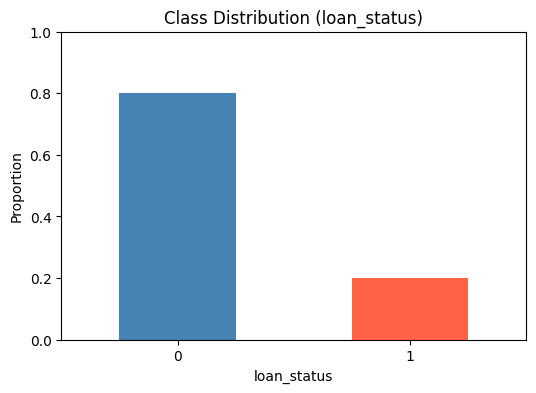

In [12]:
import matplotlib.pyplot as plt

# Your series
class_dist = loan_df["loan_status"].value_counts(normalize=True)

# --- Bar plot ---
plt.figure(figsize=(6,4))
class_dist.plot(kind="bar", color=["steelblue","tomato"])
plt.title("Class Distribution (loan_status)")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()


In [14]:
loan_df.head()

,loan_amnt,term_months,int_rate_percenta,installment,grade,sub_grade,emp_title,emp_length_years,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,3600.0,36.0,13.99,123.03,C,C4,leadman,10.0,MORTGAGE,55000.0,Not Verified,2015,0,debt_consolidation,Debt consolidation,5.91,2003,7.0,0.0,2765.0,29.7,13.0,w,Individual,1.0,0.0
1,24700.0,36.0,11.99,820.28,C,C1,Engineer,10.0,MORTGAGE,65000.0,Not Verified,2015,0,small_business,Business,16.06,1999,22.0,0.0,21470.0,19.2,38.0,w,Individual,4.0,0.0
2,20000.0,60.0,10.78,432.66,B,B4,truck driver,10.0,MORTGAGE,63000.0,Not Verified,2015,0,home_improvement,NaN,10.78,2000,6.0,0.0,7869.0,56.2,18.0,w,Joint App,5.0,0.0
4,10400.0,60.0,22.45,289.91,F,F1,Contract Specialist,3.0,MORTGAGE,104433.0,Source Verified,2015,0,major_purchase,Major purchase,25.37,1998,12.0,0.0,21929.0,64.5,35.0,w,Individual,6.0,0.0
5,11950.0,36.0,13.44,405.18,C,C3,Veterinary Tecnician,4.0,RENT,34000.0,Source Verified,2015,0,debt_consolidation,Debt consolidation,10.20,1987,5.0,0.0,8822.0,68.4,6.0,w,Individual,0.0,0.0


In [15]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1345310 entries, 0 to 2260697
Data columns (total 26 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   loan_amnt             1345310 non-null  float64
 1   term_months           1345310 non-null  float64
 2   int_rate_percenta     1345310 non-null  float64
 3   installment           1345310 non-null  float64
 4   grade                 1345310 non-null  object 
 5   sub_grade             1345310 non-null  object 
 6   emp_title             1259525 non-null  object 
 7   emp_length_years      1266799 non-null  float64
 8   home_ownership        1345310 non-null  object 
 9   annual_inc            1345310 non-null  float64
 10  verification_status   1345310 non-null  object 
 11  issue_d               1345310 non-null  int32  
 12  loan_status           1345310 non-null  int64  
 13  purpose               1345310 non-null  object 
 14  title                 1328650 non-null 

## First Inspection

In [16]:
# 1) Target balance
print("Target distribution (loan_status):")
print(loan_df["loan_status"].value_counts())
print("\nTarget distribution (%):")
print((loan_df["loan_status"].value_counts(normalize=True) * 100).round(2))

# 2) Quick overview of categorical features
print("\nCategorical columns:")
print(loan_df.select_dtypes(include=["object"]).columns.tolist())

# 3) Quick overview of numeric features
print("\nNumeric columns:")
print(loan_df.select_dtypes(include=["float64", "int64", "int32"]).columns.tolist())


Target distribution (loan_status):
loan_status
0    1076751
1     268559
Name: count, dtype: int64

Target distribution (%):
loan_status
0    80.04
1    19.96
Name: proportion, dtype: float64

Categorical columns:
['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'purpose', 'title', 'initial_list_status', 'application_type']

Numeric columns:
['loan_amnt', 'term_months', 'int_rate_percenta', 'installment', 'emp_length_years', 'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies']


In [17]:
# Missing values overview
missing = loan_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Missing values per column:")
print(missing)

print("\nPercentage missing:")
print((missing / len(loan_df) * 100).round(2))


Missing values per column:
emp_title               85785
emp_length_years        78511
mort_acc                47281
title                   16660
revol_util                857
pub_rec_bankruptcies      697
dti                       374
dtype: int64

Percentage missing:
emp_title               6.38
emp_length_years        5.84
mort_acc                3.51
title                   1.24
revol_util              0.06
pub_rec_bankruptcies    0.05
dti                     0.03
dtype: float64


Correlation of numeric features with loan_status:
loan_status             1.000000
int_rate_percenta       0.258792
term_months             0.176096
dti                     0.084510
loan_amnt               0.065604
revol_util              0.060048
installment             0.051701
issue_d                 0.051381
earliest_cr_line        0.044054
open_acc                0.028078
pub_rec                 0.026194
pub_rec_bankruptcies    0.025308
total_acc              -0.011300
emp_length_years       -0.014235
revol_bal              -0.020010
annual_inc             -0.041759
mort_acc               -0.075294
Name: loan_status, dtype: float64


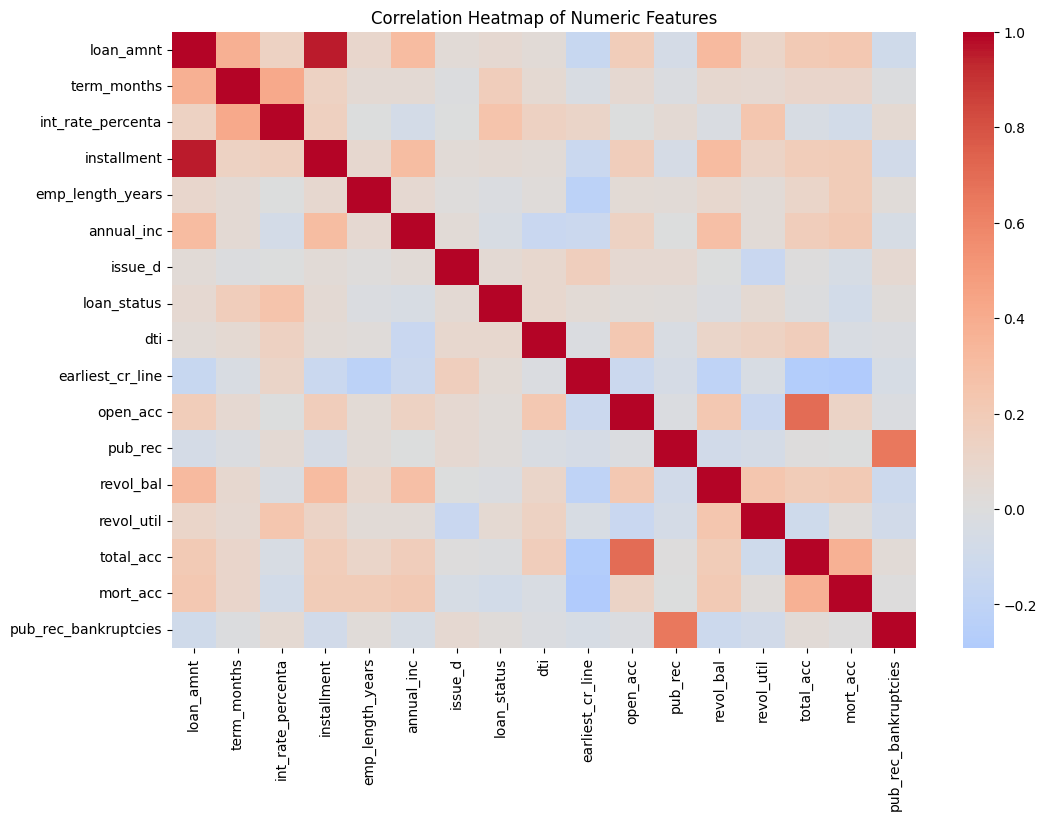

In [19]:
## numeric correlation to the target

import matplotlib.pyplot as plt
import seaborn as sns

# Correlation with target
corr = loan_df.corr(numeric_only=True)["loan_status"].sort_values(ascending=False)

print("Correlation of numeric features with loan_status:")
print(corr)

# Heatmap for numeric correlations
plt.figure(figsize=(12, 8))
sns.heatmap(loan_df.corr(numeric_only=True), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Grade vs loan_status (mean):
grade
G    0.499343
F    0.452024
E    0.384784
D    0.303822
C    0.224396
B    0.133852
A    0.060407
Name: loan_status, dtype: float64


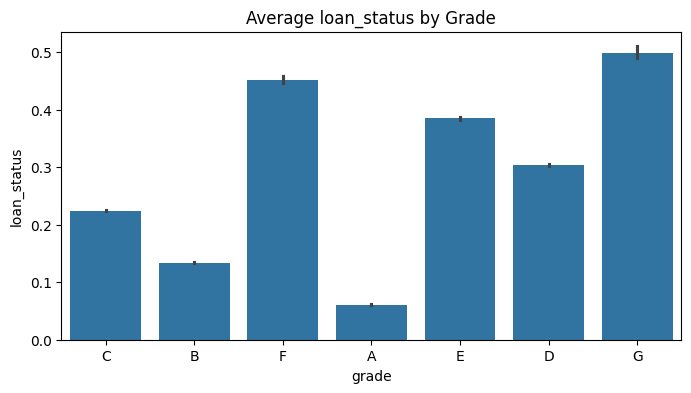


Home Ownership vs loan_status (mean):
home_ownership
RENT        0.232165
OWN         0.206198
ANY         0.195804
OTHER       0.187500
MORTGAGE    0.172077
NONE        0.145833
Name: loan_status, dtype: float64


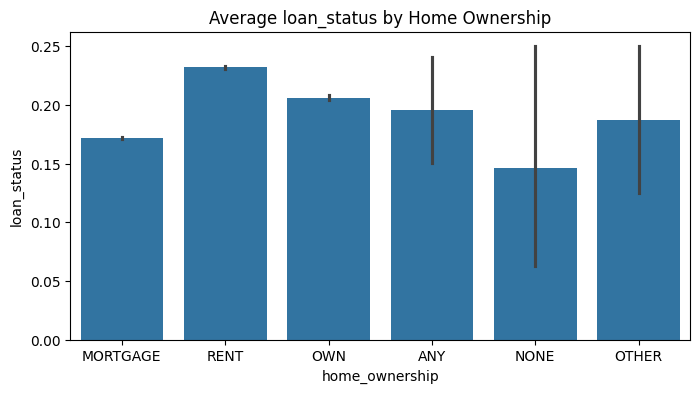

In [20]:
## oriented correlation to the target


# Grade vs loan_status (table + plot)
print("Grade vs loan_status (mean):")
print(loan_df.groupby("grade")["loan_status"].mean().sort_values(ascending=False))

plt.figure(figsize=(8,4))
sns.barplot(data=loan_df, x="grade", y="loan_status")
plt.title("Average loan_status by Grade")
plt.show()


# Home ownership vs loan_status (table + plot)
print("\nHome Ownership vs loan_status (mean):")
print(loan_df.groupby("home_ownership")["loan_status"].mean().sort_values(ascending=False))

plt.figure(figsize=(8,4))
sns.barplot(data=loan_df, x="home_ownership", y="loan_status")
plt.title("Average loan_status by Home Ownership")
plt.show()


Purpose vs loan_status (mean):
purpose
small_business        0.297094
renewable_energy      0.236870
moving                0.233544
house                 0.218806
medical               0.217757
debt_consolidation    0.211469
other                 0.210401
vacation              0.191726
major_purchase        0.185998
home_improvement      0.177158
educational           0.171779
credit_card           0.169270
car                   0.146795
wedding               0.121622
Name: loan_status, dtype: float64


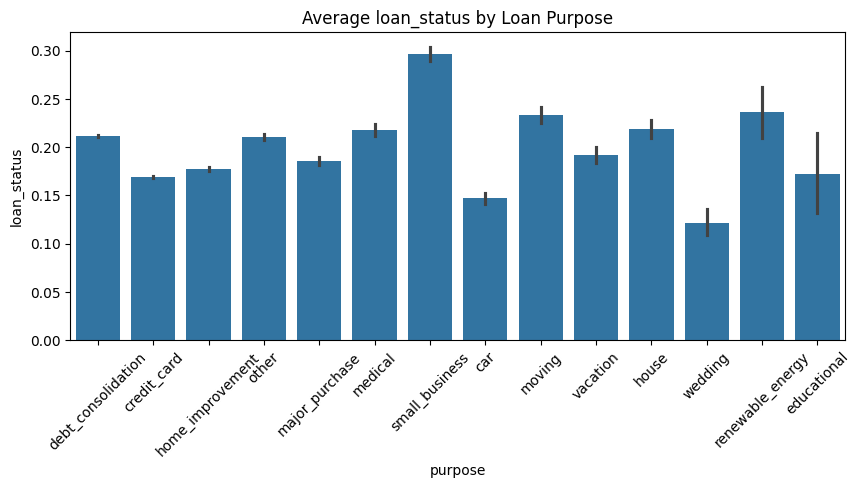

In [21]:
# Purpose vs loan_status (table + plot)
print("Purpose vs loan_status (mean):")
print(loan_df.groupby("purpose")["loan_status"].mean().sort_values(ascending=False))

plt.figure(figsize=(10,4))
sns.barplot(data=loan_df, x="purpose", y="loan_status", order=loan_df["purpose"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Average loan_status by Loan Purpose")
plt.show()


In [22]:
loan_df.installment.value_counts()

installment
327.34     3063
301.15     2690
332.10     2670
318.79     2295
312.86     2067
           ... 
619.24        1
458.34        1
1267.42       1
665.01        1
941.33        1
Name: count, Length: 83307, dtype: int64

Sub-grade vs loan_status (mean):
sub_grade
G5    0.536036
G3    0.513631
G4    0.511719
F5    0.491758
G2    0.491319
F4    0.478905
G1    0.478478
F2    0.453459
F3    0.450723
F1    0.422969
E5    0.417701
E4    0.401018
E3    0.387121
E2    0.375450
E1    0.360647
D5    0.334270
D4    0.323680
D3    0.305415
D2    0.295866
D1    0.278054
C5    0.260050
C4    0.249204
C3    0.225233
C2    0.207188
C1    0.189838
B5    0.167014
B4    0.148271
B3    0.129835
B2    0.113598
B1    0.104212
A5    0.084043
A4    0.068670
A3    0.055085
A2    0.046640
A1    0.032236
Name: loan_status, dtype: float64


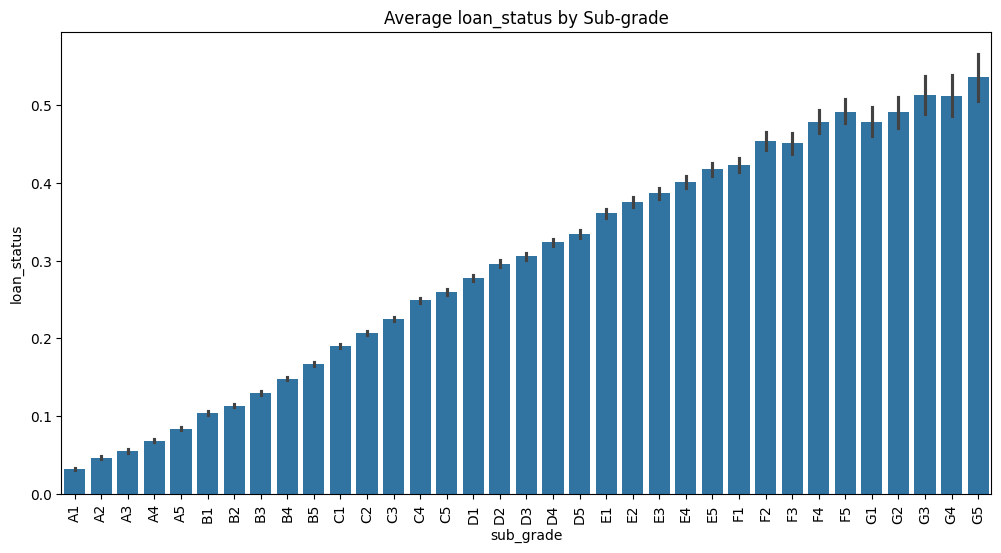

In [23]:
# Sub-grade vs loan_status (table + plot)
print("Sub-grade vs loan_status (mean):")
print(loan_df.groupby("sub_grade")["loan_status"].mean().sort_values(ascending=False))

plt.figure(figsize=(12,6))
sns.barplot(data=loan_df, x="sub_grade", y="loan_status", order=sorted(loan_df["sub_grade"].unique()))
plt.title("Average loan_status by Sub-grade")
plt.xticks(rotation=90)
plt.show()


# Data Preprocessing

🔹 Data Preprocessing Plan

1. Handle missing values

Drop:

emp_title (free-text, high-cardinality, 6% missing).

title (free-text, 1.2% missing).

Fill:

emp_length_years: replace NaN with 0 or "Unknown" (after converting to categorical).

mort_acc: impute (median or regression on correlated vars like total_acc).

revol_util, pub_rec_bankruptcies, dti: negligible missing → fill with median.

2. Remove unnecessary features

Drop columns not useful for prediction:

issue_d (leakage, since it relates to loan origination date).

earliest_cr_line (raw year, weak correlation, can be dropped or converted to credit age).

Any ID-like columns (we don’t have those in this df).

3. Outliers detection/removal

Check for extreme values in:

annual_inc (income).

dti (debt-to-income ratio).

revol_util (utilization %).

Cap extreme percentiles (e.g., 1st/99th).

4. Encoding categorical variables

Ordinal encoding:

grade → map A–G to numeric scale.

sub_grade → map A1–G5 to ordered numeric.

One-hot encoding:

home_ownership, verification_status, purpose, initial_list_status, application_type.

5. Feature scaling

For logistic regression: scale numeric features (StandardScaler).

For Random Forest: scaling not required, but safe to keep the same pipeline.

6. Train-test split

Stratify on loan_status to preserve imbalance.

Handle class imbalance with:

Logistic Regression → class_weight="balanced".

Random Forest → can use class_weight or resampling.

In [66]:
# Step 2.1 — Drop rows with missing values
loan_clean = loan_df.dropna()

# Step 2.2 — Drop unneeded columns
drop_cols = ["emp_title", "title", "grade", "issue_d", "earliest_cr_line"]
loan_clean = loan_clean.drop(columns=drop_cols)

# Step 2.3 — Create credit_age_years
loan_clean["credit_age_years"] = loan_df["issue_d"] - loan_df["earliest_cr_line"]

# Check results
print("Shape before:", loan_df.shape)
print("Shape after dropping missing & cols:", loan_clean.shape)
print("\nRemaining columns:", loan_clean.columns.tolist()[:15], "...")


Shape before: (1345310, 26)
Shape after dropping missing & cols: (1199604, 22)

Remaining columns: ['loan_amnt', 'term_months', 'int_rate_percenta', 'installment', 'sub_grade', 'emp_length_years', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal'] ...


In [67]:
# mapping sub_grade from A1,A1 - 1,2,3...

from itertools import product

# Build ordered mapping A1..G5 → 1..35
letters = list("ABCDEFG")
nums = [1,2,3,4,5]
ordered = [f"{L}{n}" for L, n in product(letters, nums)]
subgrade_map = {sg: i+1 for i, sg in enumerate(ordered)}  # A1=1 ... G5=35

# Update sub_grade in place
loan_clean["sub_grade"] = loan_clean["sub_grade"].map(subgrade_map).astype("int8")

# Quick check
print("Unique values in sub_grade:", loan_clean["sub_grade"].unique()[:10])
print("sub_grade stats:\n", loan_clean["sub_grade"].describe())


Unique values in sub_grade: [14 11 26 13  7  6  2 10 22  4]
sub_grade stats:
 count    1.199604e+06
mean     1.171078e+01
std      6.442127e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.100000e+01
75%      1.500000e+01
max      3.500000e+01
Name: sub_grade, dtype: float64


In [68]:
## Create dummies variables

# Step 2.5 — One-hot encode non-ordinal categoricals (drop_first to avoid multicollinearity)
cat_cols = ["home_ownership", "verification_status", "purpose",
            "initial_list_status", "application_type"]

# Safety: ensure these exist (in case earlier filters changed columns)
cat_cols = [c for c in cat_cols if c in loan_clean.columns]

loan_enc = pd.get_dummies(loan_clean, columns=cat_cols, drop_first=True)

# Sanity checks
print("Original shape:", loan_clean.shape)
print("Encoded shape :", loan_enc.shape)
print("Remaining object dtypes:", loan_enc.select_dtypes(include=["object"]).columns.tolist()[:10])

# Optional: quick peek at new dummy columns
new_dummy_cols = [c for c in loan_enc.columns if any(c.startswith(cc+"_") for cc in cat_cols)]
print("Sample dummy cols:", new_dummy_cols[:12])


Original shape: (1199604, 22)
Encoded shape : (1199604, 39)
Remaining object dtypes: []
Sample dummy cols: ['home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Source Verified', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house']


## outlier detection & handling.

In [69]:
# Step 2.6 — Remove outliers

num_cols = ["annual_inc", "dti", "revol_util", "loan_amnt", "installment"]

loan_no_outliers = loan_enc.copy()

for col in num_cols:
    lower = loan_no_outliers[col].quantile(0.01)
    upper = loan_no_outliers[col].quantile(0.99)
    before = loan_no_outliers.shape[0]
    loan_no_outliers = loan_no_outliers[(loan_no_outliers[col] >= lower) & (loan_no_outliers[col] <= upper)]
    after = loan_no_outliers.shape[0]
    print(f"{col}: kept {after}/{before} rows ({(after/before*100):.2f}%)")

print("\nShape after outlier removal:", loan_no_outliers.shape)


annual_inc: kept 1175990/1199604 rows (98.03%)
dti: kept 1152506/1175990 rows (98.00%)
revol_util: kept 1129598/1152506 rows (98.01%)
loan_amnt: kept 1111147/1129598 rows (98.37%)
installment: kept 1089075/1111147 rows (98.01%)

Shape after outlier removal: (1089075, 39)


In [70]:
# Apply absolute caps for outlier removal
loan_no_outliers = loan_no_outliers[
    (loan_no_outliers['annual_inc'] <= 250000) &
    (loan_no_outliers['dti'] <= 50) &
    (loan_no_outliers['open_acc'] <= 40) &
    (loan_no_outliers['total_acc'] <= 80) &
    (loan_no_outliers['revol_util'] <= 120) &
    (loan_no_outliers['revol_bal'] <= 250000)
]

print("Shape after absolute cap filtering:", loan_no_outliers.shape)


Shape after absolute cap filtering: (1085693, 39)


# Feature Engineering

In [71]:
# Copy dataset
loan_ready = loan_no_outliers.copy()



In [72]:
import numpy as np

# Compute correlation matrix
corr_matrix = loan_ready.drop(columns=["loan_status"]).corr()

# Find pairs with strong correlation
threshold = 0.8
corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)
corr_pairs.columns = ["feature_1", "feature_2", "correlation"]

high_corr = corr_pairs[abs(corr_pairs["correlation"]) > threshold] \
                .sort_values(by="correlation", ascending=False)

print("Highly correlated feature pairs (|corr| > 0.8):")
print(high_corr)



Highly correlated feature pairs (|corr| > 0.8):
                   feature_1            feature_2  correlation
72         int_rate_percenta            sub_grade     0.978294
2                  loan_amnt          installment     0.949227
459  home_ownership_MORTGAGE  home_ownership_RENT    -0.814297


In [73]:
# of two columns with strong correlation I am dropping one to drop duplication

# Drop redundant features
loan_ready = loan_ready.drop(columns=["int_rate_percenta", "installment"])

print("Shape after dropping correlated features:", loan_ready.shape)


Shape after dropping correlated features: (1085693, 37)


In [74]:
# Checking which feature are more importance for prediction using randomforest

from sklearn.ensemble import RandomForestClassifier

X = loan_ready.drop(columns=["loan_status"])
y = loan_ready["loan_status"]

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

print(top_features)


sub_grade                              0.120556
dti                                    0.104086
revol_bal                              0.097636
revol_util                             0.096628
annual_inc                             0.085846
loan_amnt                              0.079997
total_acc                              0.075988
credit_age_years                       0.069776
open_acc                               0.062651
emp_length_years                       0.046533
mort_acc                               0.030215
term_months                            0.027842
initial_list_status_w                  0.012850
pub_rec                                0.010585
verification_status_Source Verified    0.009888
dtype: float64


In [75]:
# Drop low-importance features !!

low_value_feats = [
    "initial_list_status_w",
    "pub_rec",
    "verification_status_Source Verified"
]

loan_ready = loan_ready.drop(columns=low_value_feats)

print("Shape after dropping weak features:", loan_ready.shape)


Shape after dropping weak features: (1085693, 34)


In [76]:
print("Columns in loan_ready:\n", loan_ready.columns.tolist())

# Quick look at distributions
print("\nSample stats:")
print(loan_ready[["loan_amnt", "annual_inc", "revol_bal"]].describe().T)


Columns in loan_ready:
 ['loan_amnt', 'term_months', 'sub_grade', 'emp_length_years', 'annual_inc', 'loan_status', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'credit_age_years', 'home_ownership_MORTGAGE', 'home_ownership_NONE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Verified', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding', 'application_type_Joint App']

Sample stats:
                count          mean           std      min      25%      50%  \
loan_amnt   1085693.0  14578.502855   8095.349287   1800.0   8000.0  12600.0   
annual_inc  1085693.0  74647.424235  37543.714218  21000.0  48000.0  65000.0   
revol_bal   1085693.0  15924.255078  167

In [77]:
# Create ratio features
loan_ready["loan_to_income"] = loan_ready["loan_amnt"] / (loan_ready["annual_inc"] + 1e-6)
loan_ready["revol_to_income"] = loan_ready["revol_bal"] / (loan_ready["annual_inc"] + 1e-6)

# Quick check
print(loan_ready[["loan_to_income", "revol_to_income"]].describe())


       loan_to_income  revol_to_income
count    1.085693e+06     1.085693e+06
mean     2.145533e-01     2.221801e-01
std      1.102053e-01     1.860708e-01
min      1.000000e-02     3.913043e-05
25%      1.290323e-01     1.028154e-01
50%      2.000000e-01     1.799714e-01
75%      2.857143e-01     2.904571e-01
max      1.559881e+00     5.812760e+00


In [78]:
# Checking if the new ratio features comtribute for prediction

from sklearn.ensemble import RandomForestClassifier

X = loan_ready.drop(columns=["loan_status"])
y = loan_ready["loan_status"]

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

print(top_features)


sub_grade                       0.112623
dti                             0.089067
loan_to_income                  0.082541
revol_util                      0.082520
revol_to_income                 0.080176
revol_bal                       0.079973
annual_inc                      0.069128
total_acc                       0.065220
loan_amnt                       0.063180
credit_age_years                0.060482
open_acc                        0.054311
emp_length_years                0.040418
mort_acc                        0.027436
term_months                     0.027001
verification_status_Verified    0.009133
dtype: float64


In [79]:
# Count how many rows belong to each purpose category
purpose_cols = [c for c in loan_ready.columns if c.startswith("purpose_")]
purpose_counts = loan_ready[purpose_cols].sum().sort_values(ascending=False)

print("Purpose counts:")
print(purpose_counts)


Purpose counts:
purpose_debt_consolidation    649079
purpose_credit_card           247973
purpose_home_improvement       65332
purpose_other                  53768
purpose_major_purchase         19930
purpose_medical                10687
purpose_small_business          9986
purpose_moving                  6466
purpose_vacation                5713
purpose_house                   5109
purpose_wedding                 1083
purpose_renewable_energy         606
purpose_educational                0
dtype: int64


In [80]:
# Identify purpose columns
purpose_cols = [c for c in loan_ready.columns if c.startswith("purpose_")]

# Define categories to KEEP (based on frequency)
keep_purposes = [
    "purpose_debt_consolidation",
    "purpose_credit_card",
    "purpose_home_improvement",
    "purpose_major_purchase",
    "purpose_other"  # already exists, we'll expand it
]

# Create a new merged purpose_other
loan_ready["purpose_other_merged"] = loan_ready[purpose_cols].drop(columns=keep_purposes, errors="ignore").max(axis=1)

# Drop old rare categories
drop_purposes = [c for c in purpose_cols if c not in keep_purposes]
loan_ready = loan_ready.drop(columns=drop_purposes)

print("Remaining purpose columns:", [c for c in loan_ready.columns if c.startswith("purpose_")])
print("Shape after merge:", loan_ready.shape)


Remaining purpose columns: ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other', 'purpose_other_merged']
Shape after merge: (1085693, 29)


In [81]:
# Drop the old 'purpose_other'
loan_ready = loan_ready.drop(columns=["purpose_other"])

# Rename the merged column for clarity
loan_ready = loan_ready.rename(columns={"purpose_other_merged": "purpose_other"})

print("Final purpose columns:", [c for c in loan_ready.columns if c.startswith("purpose_")])
print("Shape after cleanup:", loan_ready.shape)


Final purpose columns: ['purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_major_purchase', 'purpose_other']
Shape after cleanup: (1085693, 28)


In [82]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = loan_ready.drop(columns=["loan_status"])
y = loan_ready["loan_status"]

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)

print(top_features)


sub_grade                     0.112235
dti                           0.091758
loan_to_income                0.084565
revol_util                    0.084461
revol_to_income               0.081489
revol_bal                     0.081354
annual_inc                    0.068530
total_acc                     0.065897
loan_amnt                     0.062103
credit_age_years              0.060906
open_acc                      0.053845
emp_length_years              0.039681
mort_acc                      0.026467
term_months                   0.026171
purpose_debt_consolidation    0.009319
dtype: float64


## Scailing the data

In [83]:
from sklearn.preprocessing import StandardScaler

# Identify numeric features (excluding target and dummies)
# Dummies are all 0/1 → low number of unique values
num_cols = [col for col in loan_ready.columns 
            if loan_ready[col].dtype in ["float64","int64","int32","int8"] 
            and col != "loan_status"
            and loan_ready[col].nunique() > 3]  # filter out dummies

print("Numeric columns to scale:", num_cols)

# Scale only continuous numeric features
scaler = StandardScaler()
loan_ready[num_cols] = scaler.fit_transform(loan_ready[num_cols])

# Check result
print("\nScaled sample:")
print(loan_ready[num_cols].head())



Numeric columns to scale: ['loan_amnt', 'sub_grade', 'emp_length_years', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec_bankruptcies', 'credit_age_years', 'loan_to_income', 'revol_to_income']

Scaled sample:
   loan_amnt  sub_grade  emp_length_years  annual_inc       dti  open_acc  \
0  -1.356150   0.372971          1.078798   -0.523322 -1.549639 -0.905555   
1   1.250286  -0.095070          1.078798   -0.256965 -0.278090  1.909432   
4  -0.516161   2.245136         -0.822227    0.793358  0.888227  0.032774   
5  -0.324693   0.216957         -0.550652   -1.082670 -1.012206 -1.280886   
6   0.669705  -0.719126          1.078798    2.806132 -0.452224  0.032774   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0  -0.783436   -0.984819  -1.048087 -0.332771             -0.356874   
1   0.330166   -1.438293   1.091082  1.186426             -0.356874   
4   0.357492    0.518125   0.834382  2.199225             -0.356874  

# Train Test Data

In [84]:
# Features and target
X = loan_ready.drop("loan_status", axis=1)
y = loan_ready["loan_status"]

In [85]:
from sklearn.model_selection import train_test_split


# Train-test split with stratification (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check class balance in train/test
print("Train set class balance:")
print(y_train.value_counts(normalize=True).round(3))

print("\nTest set class balance:")
print(y_test.value_counts(normalize=True).round(3))

print("\nShapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)


Train set class balance:
loan_status
0    0.803
1    0.197
Name: proportion, dtype: float64

Test set class balance:
loan_status
0    0.803
1    0.197
Name: proportion, dtype: float64

Shapes:
X_train: (868554, 27) X_test: (217139, 27)


In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Baseline Logistic Regression (handles imbalance via class_weight)
logit = LogisticRegression(
    solver="saga",        # scalable for large datasets
    penalty="l2",
    class_weight="balanced",
    max_iter=300,
    n_jobs=None,          # keep default for broad compatibility
    random_state=42
)

logit.fit(X_train, y_train)

# Predictions
y_pred = logit.predict(X_test)
y_proba = logit.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

print("\nROC-AUC:", round(roc_auc_score(y_test, y_proba), 4))


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Confusion Matrix:
[[117647  57332]
 [ 15670  27166]]

Classification Report:
              precision    recall  f1-score   support

           0      0.882     0.672     0.763    174979
           1      0.321     0.634     0.427     42836

    accuracy                          0.665    217815
   macro avg      0.602     0.653     0.595    217815
weighted avg      0.772     0.665     0.697    217815


ROC-AUC: 0.7118


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Random Forest with class weight balanced
rf = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees grow fully
    min_samples_split=10,   # small regularization
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=3))

print("\nROC-AUC:", round(roc_auc_score(y_test, y_proba_rf), 4))


Confusion Matrix:
[[165043   9395]
 [ 34855   7846]]

Classification Report:
              precision    recall  f1-score   support

           0      0.826     0.946     0.882    174438
           1      0.455     0.184     0.262     42701

    accuracy                          0.796    217139
   macro avg      0.640     0.565     0.572    217139
weighted avg      0.753     0.796     0.760    217139


ROC-AUC: 0.7061


In [88]:
# RandomForest using other trashhold to increase default detection

import numpy as np
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
prec, rec, thresholds = precision_recall_curve(y_test, y_proba_rf)
pr_auc = auc(rec, prec)
print("PR-AUC:", round(pr_auc, 4))

# Find threshold that gives ~0.50 recall (tune as needed)
target_recall = 0.50
idx = np.argmin(np.abs(rec - target_recall))
best_thresh = thresholds[idx]
print("Chosen threshold:", round(best_thresh, 3))

# Apply new threshold
y_pred_thresh = (y_proba_rf >= best_thresh).astype(int)

# Metrics again
print("\nConfusion Matrix (adjusted):")
print(confusion_matrix(y_test, y_pred_thresh))

print("\nClassification Report (adjusted):")
print(classification_report(y_test, y_pred_thresh, digits=3))


PR-AUC: 0.3609
Chosen threshold: 0.351

Confusion Matrix (adjusted):
[[135028  39410]
 [ 21350  21351]]

Classification Report (adjusted):
              precision    recall  f1-score   support

           0      0.863     0.774     0.816    174438
           1      0.351     0.500     0.413     42701

    accuracy                          0.720    217139
   macro avg      0.607     0.637     0.615    217139
weighted avg      0.763     0.720     0.737    217139



In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)

In [90]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score, precision_recall_curve
)
import numpy as np

# 1) Split
X = loan_ready.drop(columns=["loan_status"])
y = loan_ready["loan_status"].astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_tr, X_val, y_tr, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=42, stratify=y_tr)

# 2) DMatrices
dtrain = xgb.DMatrix(X_tr, label=y_tr)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_te, label=y_te)

# 3) Params (+ imbalance handling)
scale_pos_weight = (y_tr == 0).sum() / (y_tr == 1).sum()
print("scale_pos_weight =", round(scale_pos_weight, 3))

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 6,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "min_child_weight": 1,
    "lambda": 1.0,
    "alpha": 0.0,
    "scale_pos_weight": scale_pos_weight,
    "tree_method": "hist",
    "seed": 42,
}

# 4) Train with early stopping
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=2000,
    evals=[(dtrain, "train"), (dval, "validation")],
    early_stopping_rounds=50,
    verbose_eval=False
)

# 5) Predict on TEST using best iteration
y_proba = bst.predict(dtest, iteration_range=(0, bst.best_iteration + 1))

# 6) Metrics
print("ROC-AUC:", round(roc_auc_score(y_te, y_proba), 4))
print("PR-AUC :", round(average_precision_score(y_te, y_proba), 4))

# 7) Pick threshold for ~50% recall (tune as desired)
prec, rec, thr = precision_recall_curve(y_te, y_proba)
target_recall = 0.50
idx = np.argmin(np.abs(rec - target_recall))
best_t = thr[idx] if idx < len(thr) else 0.5
print("Chosen threshold:", round(best_t, 3))

y_pred = (y_proba >= best_t).astype(int)

print("\nConfusion Matrix:")
print(confusion_matrix(y_te, y_pred))
print("\nClassification Report:")
print(classification_report(y_te, y_pred, digits=3))


scale_pos_weight = 4.085
ROC-AUC: 0.7169
PR-AUC : 0.3778
Chosen threshold: 0.584

Confusion Matrix:
[[137081  37357]
 [ 21350  21351]]

Classification Report:
              precision    recall  f1-score   support

           0      0.865     0.786     0.824    174438
           1      0.364     0.500     0.421     42701

    accuracy                          0.730    217139
   macro avg      0.614     0.643     0.622    217139
weighted avg      0.767     0.730     0.744    217139



In [91]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# Define thresholds to test
thresholds = np.linspace(0.3, 0.7, 9)  # 0.30, 0.35, ..., 0.70

results = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    results.append((t, precision, recall, f1))

# Display results
print("Threshold | Precision | Recall | F1")
for t, p, r, f in results:
    print(f"{t:.2f}      | {p:.3f}     | {r:.3f}   | {f:.3f}")


Threshold | Precision | Recall | F1
0.30      | 0.240     | 0.922   | 0.381
0.35      | 0.255     | 0.879   | 0.395
0.40      | 0.272     | 0.825   | 0.410
0.45      | 0.292     | 0.757   | 0.422
0.50      | 0.316     | 0.672   | 0.430
0.55      | 0.343     | 0.575   | 0.430
0.60      | 0.374     | 0.466   | 0.415
0.65      | 0.411     | 0.357   | 0.382
0.70      | 0.451     | 0.252   | 0.323


In [95]:
from sklearn.metrics import confusion_matrix, classification_report

# Best threshold (highest recall)
best_t = 0.30  

# Apply threshold
y_pred_best = (y_proba >= best_t).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (threshold =", best_t, "):")
print(cm)

# Detailed report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, digits=3))



Confusion Matrix (threshold = 0.3 ):
[[ 49732 124706]
 [  3338  39363]]

Classification Report:
              precision    recall  f1-score   support

           0      0.937     0.285     0.437    174438
           1      0.240     0.922     0.381     42701

    accuracy                          0.410    217139
   macro avg      0.589     0.603     0.409    217139
weighted avg      0.800     0.410     0.426    217139



In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define the model
mlp = MLPClassifier(
    solver="lbfgs",              # optimizer
    alpha=1e-5,                  # L2 penalty (regularization)
    hidden_layer_sizes=(5, 2),   # architecture (two hidden layers: 5 neurons, then 2 neurons)
    random_state=42,
    max_iter=500                 # increase iterations for convergence
)

# Fit
mlp.fit(X_train, y_train)

# Predict
y_pred_mlp = mlp.predict(X_test)
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp, digits=3))

print("\nROC-AUC:", round(roc_auc_score(y_test, y_proba_mlp), 4))


Confusion Matrix:
[[174438      0]
 [ 42701      0]]

Classification Report:
              precision    recall  f1-score   support

           0      0.803     1.000     0.891    174438
           1      0.000     0.000     0.000     42701

    accuracy                          0.803    217139
   macro avg      0.402     0.500     0.445    217139
weighted avg      0.645     0.803     0.716    217139


ROC-AUC: 0.5


C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [94]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import numpy as np

# class-balanced sample weights
sw = compute_sample_weight(class_weight="balanced", y=y_train)

mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=1e-3,
    alpha=1e-4,                 # L2
    batch_size=512,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1,
    random_state=42,
    verbose=False
)

mlp.fit(X_train, y_train, sample_weight=sw)

# probs + threshold tuning for recall
y_proba_mlp = mlp.predict_proba(X_test)[:, 1]

# pick threshold for ~0.50 recall (adjust as you wish)
prec, rec, thr = precision_recall_curve(y_test, y_proba_mlp)
target_recall = 0.50
idx = np.argmin(np.abs(rec - target_recall))
best_t = thr[idx] if idx < len(thr) else 0.5

y_pred_mlp = (y_proba_mlp >= best_t).astype(int)

print("Chosen threshold:", round(best_t, 3))
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba_mlp), 4))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp, digits=3))


Chosen threshold: 0.592
ROC-AUC: 0.7163

Confusion Matrix:
[[137170  37268]
 [ 21350  21351]]

Classification Report:
              precision    recall  f1-score   support

           0      0.865     0.786     0.824    174438
           1      0.364     0.500     0.421     42701

    accuracy                          0.730    217139
   macro avg      0.615     0.643     0.623    217139
weighted avg      0.767     0.730     0.745    217139



In [101]:
!pip install xgboost

In [104]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ------- -------------------------------- 10.7/56.8 MB 51.7 MB/s eta 0:00:01
   ---------------- ----------------------- 24.1/56.8 MB 52.7 MB/s eta 0:00:01
   ------------------------ --------------- 34.6/56.8 MB 52.3 MB/s eta 0:00:01
   ------------------------------- -------- 45.4/56.8 MB 52.4 MB/s eta 0:00:01
   ---------------------------------------  55.6/56.8 MB 51.3 MB/s eta 0:00:01
   ---------------------------------------  56.6/56.8 MB 51.5 MB/s eta 0:00:01
   ---------------------------------------- 56.8/56.8 MB 43.6 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


# Inspecting more feature engineer

In [38]:
loan_ready.head()


,loan_amnt,term_months,int_rate_percenta,installment,sub_grade,emp_length_years,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,credit_age_years,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,initial_list_status_w,application_type_Joint App
0,-1.356150,36.0,0.166786,-1.339504,0.372971,1.078798,-0.523322,0,-1.549639,-0.905555,-0.358779,-0.783436,-0.984819,-1.048087,-0.332771,-0.356874,-0.565044,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,1.250286,36.0,-0.253421,1.600461,-0.095070,1.078798,-0.256965,0,-0.278090,1.909432,-0.358779,0.330166,-1.438293,1.091082,1.186426,-0.356874,-0.006448,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,-0.516161,60.0,1.944261,-0.635852,2.245136,-0.822227,0.793358,0,0.888227,0.032774,-0.358779,0.357492,0.518125,0.834382,2.199225,-0.356874,0.133200,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
5,-0.324693,36.0,0.051229,-0.149814,0.216957,-0.550652,-1.082670,0,-1.012206,-1.280886,-0.358779,-0.422832,0.686558,-1.647055,-0.839170,-0.356874,1.669338,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
6,0.669705,36.0,-0.845912,0.830104,-0.719126,1.078798,2.806132,0,-0.452224,0.032774,-0.358779,4.251079,1.381886,0.149847,1.186426,-0.356874,1.250392,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
loan_ready.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1085693 entries, 0 to 2260697
Data columns (total 39 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   loan_amnt                            1085693 non-null  float64
 1   term_months                          1085693 non-null  float64
 2   int_rate_percenta                    1085693 non-null  float64
 3   installment                          1085693 non-null  float64
 4   sub_grade                            1085693 non-null  float64
 5   emp_length_years                     1085693 non-null  float64
 6   annual_inc                           1085693 non-null  float64
 7   loan_status                          1085693 non-null  int64  
 8   dti                                  1085693 non-null  float64
 9   open_acc                             1085693 non-null  float64
 10  pub_rec                              1085693 non-null  float64
 11  rev

In [33]:
loan_ready["loan_status"].value_counts(dropna=False)


loan_status
0    872189
1    213504
Name: count, dtype: int64

| Rank | Feature                                                     | Type           | Predictive Strength | Why it Matters                                                                    |
| ---- | ----------------------------------------------------------- | -------------- | ------------------- | --------------------------------------------------------------------------------- |
| 1    | **sub_grade / grade**                                       | Categorical    | ⭐⭐⭐⭐⭐ (Very High)   | Strong monotonic trend (A ≈ 97% paid → G ≈ 46% paid). Key creditworthiness proxy. |
| 2    | **int_rate_percent**                                        | Numeric        | ⭐⭐⭐⭐⭐ (Very High)   | Strongest numeric correlation (–0.26). Higher interest = higher default.          |
| 3    | **term_months**                                             | Numeric        | ⭐⭐⭐⭐☆ (High)        | 60-month loans default much more than 36-month. Clear separation.                 |
| 4    | **dti** (Debt-to-Income)                                    | Numeric        | ⭐⭐⭐⭐☆ (High)        | Correlated (–0.08). Borrowers with high DTI struggle more to repay.               |
| 5    | **purpose**                                                 | Categorical    | ⭐⭐⭐⭐☆ (High)        | Certain purposes (small_business, medical) are much riskier than others.          |
| 6    | **verification_status**                                     | Categorical    | ⭐⭐⭐⭐☆ (High)        | Clear differences: Verified ≈ 24% default vs Not Verified ≈ 15%.                  |
| 7    | **home_ownership**                                          | Categorical    | ⭐⭐⭐⭐☆ (High)        | RENT default ≈ 23% vs MORTGAGE ≈ 17%. Adds demographic/financial context.         |
| 8    | **loan_amnt**                                               | Numeric        | ⭐⭐⭐☆ (Medium)       | Larger loans show slightly higher default (–0.07).                                |
| 9    | **revol_util**                                              | Numeric        | ⭐⭐⭐☆ (Medium)       | Higher utilization → higher default (–0.06).                                      |
| 10   | **application_type**                                        | Categorical    | ⭐⭐☆☆ (Low-Med)      | Joint apps default more (25% vs 20%). Small effect, but categorical signal.       |
| 11   | **annual_inc**                                              | Numeric        | ⭐⭐☆☆ (Low-Med)      | Weak correlation (+0.04). Useful with log transform / binning.                    |
| 12   | **mort_acc**                                                | Numeric        | ⭐⭐☆☆ (Low-Med)      | Slight positive correlation (+0.07). May proxy mortgage creditworthiness.         |
| 13   | **issue_d** (loan vintage)                                  | Date → Numeric | ⭐⭐☆☆ (Low-Med)      | Older vintages may have different repayment patterns; needs feature engineering.  |
| 14   | **earliest_cr_line** (credit history length)                | Date → Numeric | ⭐⭐☆☆ (Low-Med)      | Longer history = slightly safer (–0.04). Feature engineering improves it.         |
| 15   | **installment**                                             | Numeric        | ⭐☆☆☆ (Low)          | Overlaps with loan_amnt & int_rate. Adds limited unique signal.                   |
| 16   | **revol_bal**                                               | Numeric        | ⭐☆☆☆ (Low)          | Very weak correlation (+0.02).                                                    |
| 17   | **emp_length_years**                                        | Numeric        | ⭐☆☆☆ (Low)          | Almost no predictive power (+0.01).                                               |
| 18   | **total_acc**                                               | Numeric        | ⭐☆☆☆ (Low)          | Very weak (0.01).                                                                 |
| 19   | **pub_rec / bankruptcies / open_acc / initial_list_status** | Numeric / Cat  | 🚫 (Very Low)       | Noisy, correlations <0.03. Likely safe to drop.                                   |
